<a href="https://colab.research.google.com/github/plaban1981/NLP/blob/master/FakeNewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
!pip install pycaret

     |████████████████████████████████| 194kB 7.8MB/s 
     |████████████████████████████████| 7.0MB 9.6MB/s 
     |████████████████████████████████| 133kB 56.8MB/s 
     |████████████████████████████████| 389kB 51.4MB/s 
     |████████████████████████████████| 1.6MB 55.0MB/s 
     |████████████████████████████████| 1.2MB 48.0MB/s 
     |████████████████████████████████| 266kB 47.5MB/s 
     |████████████████████████████████| 63.9MB 47kB/s 
     |████████████████████████████████| 3.0MB 53.4MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 102kB 13.5MB/s 
     |████████████████████████████████| 614kB 44.9MB/s 
     |████████████████████████████████| 552kB 38.0MB/s 
     |████████████████████████████████| 6.1MB 45.8MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 235kB 59.3MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
 

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"7021605f0dadd19e198a07f397efa623"}'}

In [0]:
 ! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c fake-news

  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 15.8MB/s]
100% 37.0M/37.0M [00:00<00:00, 35.2MB/s]
100% 37.0M/37.0M [00:00<00:00, 58.4MB/s]
 53% 5.00M/9.42M [00:00<00:00, 22.5MB/s]
100% 9.42M/9.42M [00:00<00:00, 37.3MB/s]


In [7]:
#! mkdir fake-news
! unzip train.csv.zip -d fake-news
! unzip test.csv.zip -d fake-news

Archive:  train.csv.zip
  inflating: fake-news/train.csv     
Archive:  test.csv.zip
  inflating: fake-news/test.csv      


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
df = pd.read_csv('/content/fake-news/train.csv')

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

title      558
author    1957
text        39
dtype: int64

In [0]:
df=df.dropna()

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [0]:
text = messages['text'].iloc[0]
text = " ".join(lemmatizer.lemmatize(word.lower()) for word in text.split() if word.lower() not in stop_words)

In [0]:
def cleaned_text(text):
  text = re.sub("http\s+",' ',text)
  text = re.sub('[^a-zA-Z]', ' ',text)
  text = " ".join(lemmatizer.lemmatize(word.lower()) for word in text.split() if word.lower() not in stop_words)
  return text

In [14]:
cleaned_text(text)

'house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know case comey a

In [0]:
messages['cleaned_text'] = messages['text'].apply(lambda x: cleaned_text(x))

In [16]:
messages[['text','cleaned_text']].head()

,text,cleaned_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,house dem aide even see comey letter jason cha...
1,Ever get the feeling your life circles the rou...,ever get feeling life circle roundabout rather...
2,"Why the Truth Might Get You Fired October 29, ...",truth might get fired october tension intellig...
3,Videos 15 Civilians Killed In Single US Airstr...,video civilian killed single u airstrike ident...
4,Print \nAn Iranian woman has been sentenced to...,print iranian woman sentenced six year prison ...


## Separating Features and Labels

In [0]:
X = messages['cleaned_text']
Y = messages['label']

## TFidf Vectorizer


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(messages['cleaned_text']).toarray()

In [19]:
tfidf_v.get_feature_names()[:10]

['aaron',
 'abandon',
 'abandoned',
 'abc',
 'abe',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad']

In [20]:
df_tfidf = pd.DataFrame(X,columns=tfidf_v.get_feature_names())
df_tfidf.head()

,aaron,abandon,abandoned,abc,abe,abedin,ability,able,abortion,abroad,absence,absolute,absolutely,abu,abuse,academic,academy,accept,acceptable,acceptance,accepted,accepting,access,access pipeline,accident,accompanied,accord,according,according report,account,accountability,accountable,accurate,accusation,accused,accusing,achieve,achieved,achievement,acid,...,wounded,write,writer,writes,writing,written,wrong,wrote,www,xi,yahoo,yard,yeah,year,year ago,year later,year mr,year old,year said,yellow,yemen,yes,yesterday,yet,yet another,yiannopoulos,yield,york,york city,york time,young,young people,younger,youth,youtube,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.058060,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028022,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021687,0.044208,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033382,0.034431,0.028355,0.0,0.0,0.0,0.036097,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.102744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.030569,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011164,0.000000,0.031093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036637,0.035072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.058531,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.194017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084747,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_tfidf['Label'] =Y

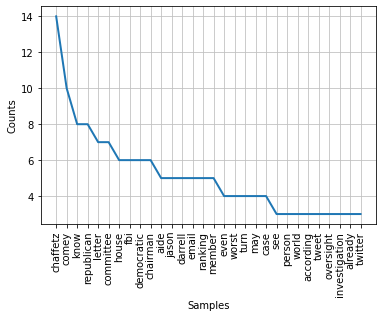

In [67]:
tokens = nltk.tokenize.word_tokenize(messages['cleaned_text'].iloc[0])
fd = nltk.FreqDist(tokens)
fd.plot(30,cumulative=False)

# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [37]:
X_train.shape,X_test.shape

((12250, 5000), (6035, 5000))

# Build Model

In [44]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred = classifier.predict(X_test)

Accuracy of the model :  0.895940347970174


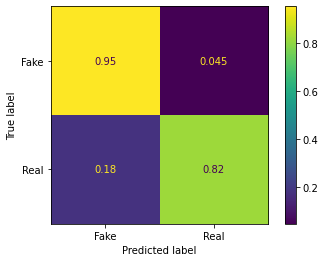

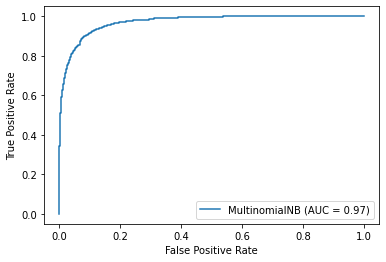

In [63]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,accuracy_score,confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print('Accuracy of the model : ',accuracy_score(y_test,y_pred))
plot_confusion_matrix(classifier,X_test, y_test,display_labels=['Fake','Real'],normalize='true')
plot_roc_curve(classifier,X_test, y_test)

# Passive Aggressive Classifier Algorithm

Accuracy of the model :  0.9496271748135874


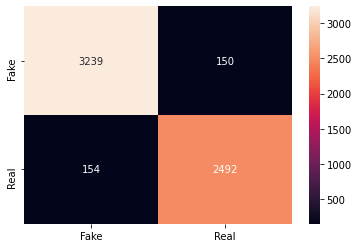

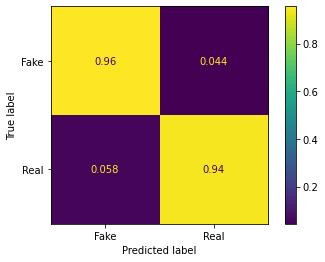

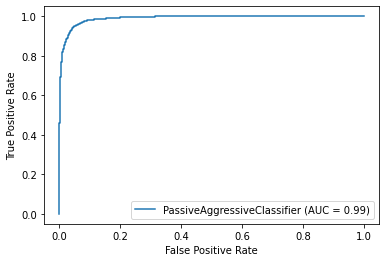

In [71]:
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,accuracy_score,confusion_matrix
import seaborn as sns

linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print('Accuracy of the model : ',accuracy_score(y_test,y_pred))



sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])

plot_confusion_matrix(linear_clf ,X_test, y_test,display_labels=['Fake','Real'],normalize='true')

plot_roc_curve(linear_clf,X_test, y_test)


# Multinomial Classifier with Hyperparameter

In [75]:
mclassifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8972659486329743
Alpha: 0.1, Score : 0.8969345484672743
Alpha: 0.2, Score : 0.895774647887324
Alpha: 0.30000000000000004, Score : 0.8956089478044739
Alpha: 0.4, Score : 0.895940347970174
Alpha: 0.5, Score : 0.895774647887324
Alpha: 0.6000000000000001, Score : 0.8961060480530241
Alpha: 0.7000000000000001, Score : 0.895774647887324
Alpha: 0.8, Score : 0.8961060480530241
Alpha: 0.9, Score : 0.895940347970174


In [76]:
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

Accuracy of the model :  0.895940347970174


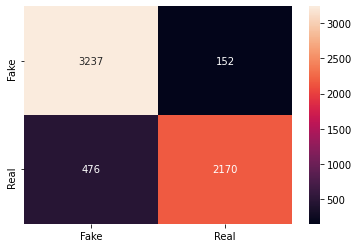

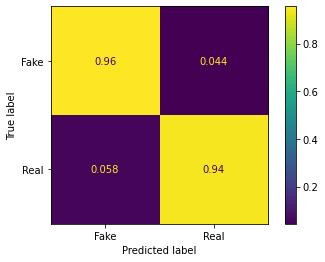

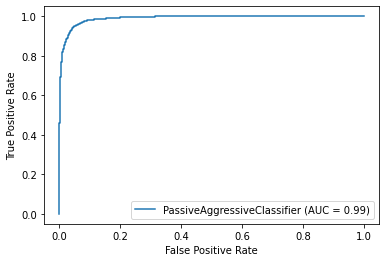

In [77]:
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print('Accuracy of the model : ',accuracy_score(y_test,y_pred))



sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])

plot_confusion_matrix(linear_clf ,X_test, y_test,display_labels=['Fake','Real'],normalize='true')

plot_roc_curve(linear_clf,X_test, y_test)

In [78]:
classifier.coef_[0]

array([-9.48305995, -9.663734  , -9.38759755, ..., -8.97473911,
       -8.25438939, -8.38332899])

In [81]:
### Most real
sorted(zip(classifier.coef_[0], df_tfidf.drop('Label',axis=1).columns), reverse=True)[:20]

[(-5.360662287502713, 'clinton'),
 (-5.46155885453654, 'trump'),
 (-5.6493243521695655, 'hillary'),
 (-6.0154073143019104, 'election'),
 (-6.094521796714642, 'people'),
 (-6.171563153888836, 'email'),
 (-6.182376815878838, 'state'),
 (-6.184067580285422, 'one'),
 (-6.265211254675366, 'hillary clinton'),
 (-6.270530474987586, 'fbi'),
 (-6.280100612736066, 'would'),
 (-6.332513164348486, 'american'),
 (-6.355345917153482, 'time'),
 (-6.35825506953501, 'war'),
 (-6.366870043273305, 'world'),
 (-6.406540233719227, 'year'),
 (-6.4190209497298625, 'october'),
 (-6.419983313180116, 'like'),
 (-6.441378234581917, 'new'),
 (-6.441490973350547, 'said')]

In [82]:
### Most fake
sorted(zip(classifier.coef_[0], df_tfidf.drop('Label',axis=1).columns))[:20]

[(-10.976939527964282, 'briefing posted'),
 (-10.976939527964282, 'devos'),
 (-10.976939527964282, 'gorsuch'),
 (-10.976939527964282, 'judge gorsuch'),
 (-10.976939527964282, 'mr ailes'),
 (-10.976939527964282, 'mr bannon'),
 (-10.976939527964282, 'mr christie'),
 (-10.976939527964282, 'mr cruz'),
 (-10.976939527964282, 'mr kushner'),
 (-10.976939527964282, 'mr sander'),
 (-10.976939527964282, 'mr spicer'),
 (-10.976939527964282, 'mr xi'),
 (-10.976939527964282, 'pruitt'),
 (-10.976939527964282, 'tillerson'),
 (-10.937570603078857, 'spicer'),
 (-10.937389841502759, 'sean spicer'),
 (-10.93347564719354, 'weekday eastern'),
 (-10.932990642378634, 'mr penny'),
 (-10.9144673416669, 'like mr'),
 (-10.914208385665543, 'said mr trump')]

# HashingVectorizer

It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean unit sphere if norm=’l2’.

This text vectorizer implementation uses the hashing trick to find the token string name to feature integer index mapping.

This strategy has several advantages:

it is very low memory scalable to large datasets as there is no need to store a vocabulary dictionary in memory

it is fast to pickle and un-pickle as it holds no state besides the constructor parameters

it can be used in a streaming (partial fit) or parallel pipeline as there is no state computed during fit.

There are also a couple of cons (vs using a CountVectorizer with an in-memory vocabulary):

there is no way to compute the inverse transform (from feature indices to string feature names) which can be a problem when trying to introspect which features are most important to a model.

there can be collisions: distinct tokens can be mapped to the same feature index. However in practice this is rarely an issue if n_features is large enough (e.g. 2 ** 18 for text classification problems).

In [0]:
hs_vectorizer=HashingVectorizer(n_features=5000,alternate_sign=False)
X=hs_vectorizer.fit_transform(messages['cleaned_text']).toarray()

In [89]:
X.shape

(18285, 5000)

In [0]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

Accuracy of the model :  0.8692626346313174


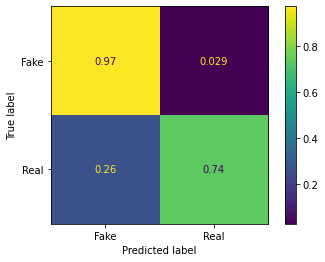

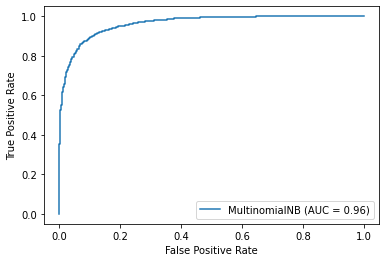

In [91]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy of the model : ',accuracy_score(y_test,y_pred))
plot_confusion_matrix(classifier,X_test, y_test,display_labels=['Fake','Real'],normalize='true')
plot_roc_curve(classifier,X_test, y_test)

Accuracy of the model :  0.9189726594863298


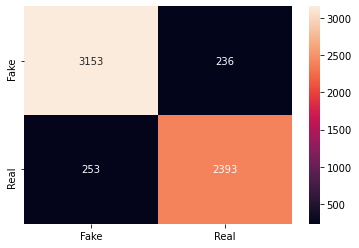

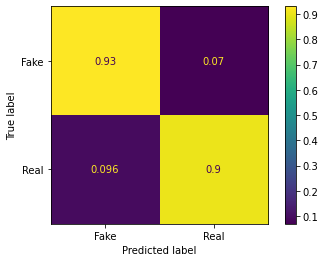

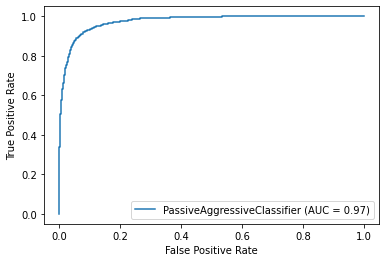

In [92]:

linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print('Accuracy of the model : ',accuracy_score(y_test,y_pred))



sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])

plot_confusion_matrix(linear_clf ,X_test, y_test,display_labels=['Fake','Real'],normalize='true')

plot_roc_curve(linear_clf,X_test, y_test)
